# ÁRBOLES DE DECISIÓN 

### Cargamos Libreria de Arbol

In [5]:
# #? Cargamos las librerias
from sklearn import tree 

### Cargamos los datos desde un archivo .CSV

In [6]:
# Cargamos las librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [7]:
datos = pd.read_csv("../dataset/Dataset-Soda.csv")
datos

,popcorn,soda,edad,gusta_cine
0,Si,Si,7,No
1,Si,No,12,No
2,No,Si,18,Si
3,No,Si,35,Si
4,Si,Si,38,Si
5,Si,No,50,No
6,No,No,83,No


### Transformamos los valores nominales a numéricos 

In [8]:
atributos = list(datos.columns)

for atri in atributos:
    if atri == 'popcorn':
        datos[atri] = datos[atri].map({'Si':1, 'No':0})
    elif atri == 'soda':
        datos[atri] = datos[atri].map({'Si':1, 'No':0})
    elif atri == 'gusta_cine':
        datos[atri] = datos[atri].map({'Si':1, 'No':0})

In [9]:
datos

,popcorn,soda,edad,gusta_cine
0,1,1,7,0
1,1,0,12,0
2,0,1,18,1
3,0,1,35,1
4,1,1,38,1
5,1,0,50,0
6,0,0,83,0


#### Variables dependientes e independientes

In [10]:
# Variables Independientes
columnas = datos.columns
vi = [col for col in columnas if col != 'gusta_cine']
# vi = ['Edad', 'Experiencia', 'Calificacion', 'Pais']
x = datos[vi].values

# Variable dependiente

y = datos['gusta_cine']

In [11]:
vi

['popcorn', 'soda', 'edad']

### Generar el modelo de clasificacion

In [12]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[0,1,15]])

if predicciones == 0:
    print('No le gusta el Cine')
else:
    print('Si le gusta el Cine')

Si le gusta el Cine


### Graficar el Arbol de clasificacion

se utiliza la libreria Grapviz
* pip install pydotplus

<function matplotlib.pyplot.show(close=None, block=None)>

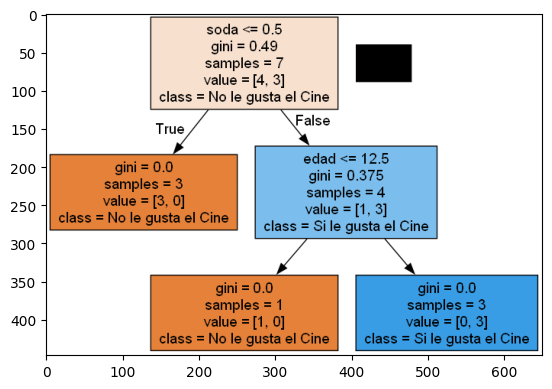

In [13]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

clase = ['No le gusta el Cine', 'Si le gusta el Cine'] 

datos = tree.export_graphviz(clasificador, 
                            class_names=clase,
                            feature_names=vi,
                            filled=True,
                            )
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('miarbol4.png')
imagen = pltimg.imread('miarbol4.png')
plt.imshow(imagen)
plt.show